In [32]:
import json
from os import path
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

import sys
sys.path.append("/home/shtoshni/Research/events/src")

from red_utils.constants import IDX_TO_ELEM_TYPE, ELEM_TYPE_TO_IDX

In [33]:
train_file_path = "/home/shtoshni/Research/events/proc_data/red/ment_det/independent/train.512.jsonlines"
train_data = []
with open(train_file_path) as f:
    for line in f:
        train_data.append(json.loads(line.strip()))

### Get mention to doc len ratio

In [34]:
span_type_to_len_ratio_list = defaultdict(list)

for instance in train_data:
    doc_len = sum([len(sentence) for sentence in instance["sentences"]])
    
    for elem_type, elem_idx in ELEM_TYPE_TO_IDX.items():
        num_mentions = sum([1 for _, _, ment_type in instance["mentions"] if ment_type == elem_idx])
        span_type_to_len_ratio_list[elem_type].append(num_mentions/doc_len)


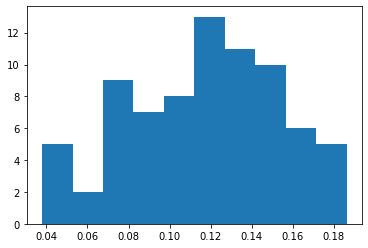

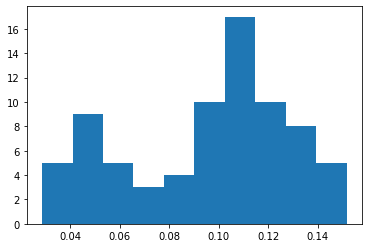

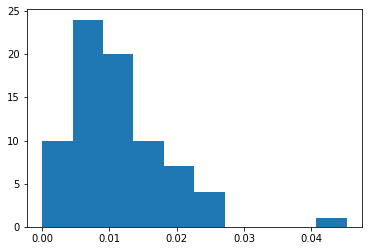

In [37]:
for elem_type in ELEM_TYPE_TO_IDX:
    if elem_type == 'BOTH':
        continue
    plt.hist(span_type_to_len_ratio_list[elem_type])
    plt.show()

### Get mention type counts

Counter({'ENTITY': 8102, 'EVENT': 7027, 'TIMEX3': 696})
15802 15825
15821 15825


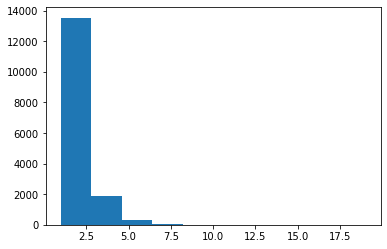

In [36]:
span_type_count = Counter()
span_widths = []

for instance in train_data:
    for span_start, span_end, span_type in instance["mentions"]:
        span_type_count[IDX_TO_ELEM_TYPE[span_type]] += 1
        span_widths.append(span_end - span_start + 1)
        
print(span_type_count)


plt.hist(span_widths)
import numpy as np
print(sum(np.array(span_widths) <= 10), len(span_widths))
print(sum(np.array(span_widths) <= 15), len(span_widths))